In [2]:
import time
import numpy as np
import sys
import pandas as pd
from scipy.signal import convolve2d

from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

sys.path.append('..')

from Decision_tree.decision_Tree import DecisionTree

In [3]:

data = np.load('../Data/fashion_train.npy')
X = data[:,:-1]
y = data[:,-1]
print("X shape: ", X.shape)
print("y shape: ", y.shape)


# convert all images in the training set to boolean values (True if pixel value > 0, False otherwise)
result = pd.DataFrame(columns=['max depth', 'bool_cutoff', 'train_score', 'val_score', 'time_taken'])

total_combinations = 10
combinations_ran = 0

for depth in [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]:
    run_pca = False
    random_cutoffs = False
    combinations_ran += 1
    # print how many combinations have been run and the procentage of the total combinations
    print(f"computing {combinations_ran} out of {total_combinations} ({combinations_ran/total_combinations:.2%})")

    data = X > 15

    mask = [
        [-1, -1, -1],
        [-1, 8, -1],
        [-1, -1, -1]
    ]
    
    # apply convolution to all images
    # for i in range(data.shape[0]):
    #     img = data[i]
    #     img = img.reshape(28, 28)
    #     img = 1 * convolve2d(img, mask, mode="same")
    #     data[i] = img.reshape(784)

    np.random.seed(0)
    X_train, X_val, y_train, y_val = train_test_split(data, y, test_size=0.2, random_state=42)

    if run_pca:
        pca = PCA(n_components=0.95)
        X_train = pca.fit_transform(X_train)
        X_val = pca.transform(X_val)
    
    clf = DecisionTree(X_train, y_train, debug = False,random_cutoffs=random_cutoffs, random_forest=False, max_depth=depth)
    start = time.time()
    clf.fit()

    clf_total = DecisionTree(data, y, debug = False,random_cutoffs=random_cutoffs, random_forest=False, max_depth=depth)
    clf_total.fit()

    # concat results to dataframe
    new_result = pd.DataFrame({'max depth': depth, 'bool_cutoff': 15, 'train_score': clf.score(X_train, y_train), 'val_score': clf.score(X_val, y_val), 'total_score': clf_total.score(data, y), 'time_taken': time.time() - start}, index=[0])
    result = pd.concat([result.loc[:], new_result]).reset_index(drop=True)

X shape:  (10000, 784)
y shape:  (10000,)
computing 1 out of 10 (10.00%)


computing 2 out of 10 (20.00%)


computing 3 out of 10 (30.00%)


computing 4 out of 10 (40.00%)


computing 5 out of 10 (50.00%)


computing 6 out of 10 (60.00%)


computing 7 out of 10 (70.00%)


computing 8 out of 10 (80.00%)


computing 9 out of 10 (90.00%)


computing 10 out of 10 (100.00%)


In [4]:
result["from max"] = result["val_score"].max() - result["val_score"]
result.drop(columns=["bool_cutoff", "from max"], inplace=True)

result_over_3 = result[result["max depth"] > 3]

AttributeError: module 'matplotlib.pyplot' has no attribute 'thight_layout'

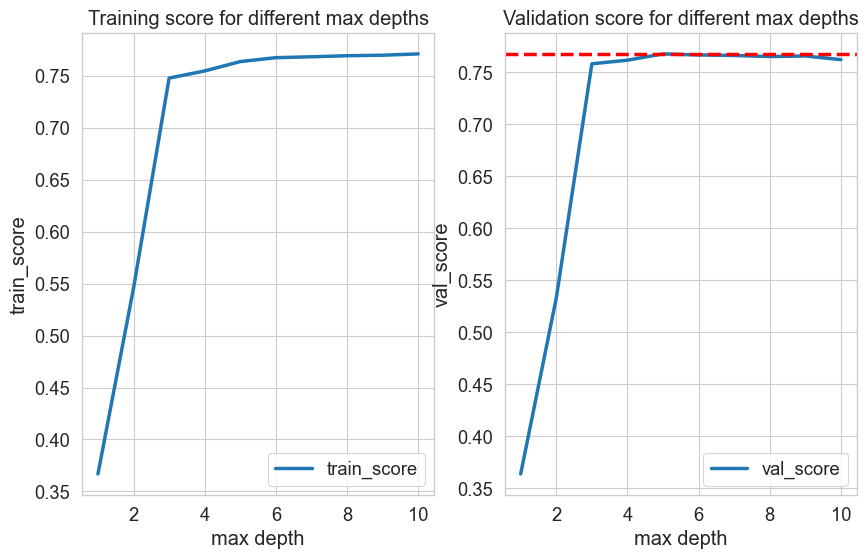

In [5]:
# plot a bar chart of the train and val scores grouped by each bool_cutoff
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")
sns.set_context("paper", font_scale=1.5, rc={"lines.linewidth": 2.5})

fig = plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
sns.lineplot(x='max depth', y='train_score', data=result, label="train_score")
plt.title('Training score for different max depths')
plt.legend(loc='lower right')


plt.subplot(1, 2, 2)
sns.lineplot(x='max depth', y='val_score', data=result, label="val_score")
plt.title('Validation score for different max depths')
plt.legend(loc='lower right')

# plot horisontal line at the best validation score
plt.axhline(result["val_score"].max(), color='r', linestyle='--')

plt.thight_layout()


In [52]:
# extract results with depth 3 and above
result_over_3 = result[result["max depth"] >= 3]

/var/folders/qz/wqzp3lwn1mv11s24jrr95xr80000gn/T/ipykernel_11592/3911426537.py:5: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 1, 1)


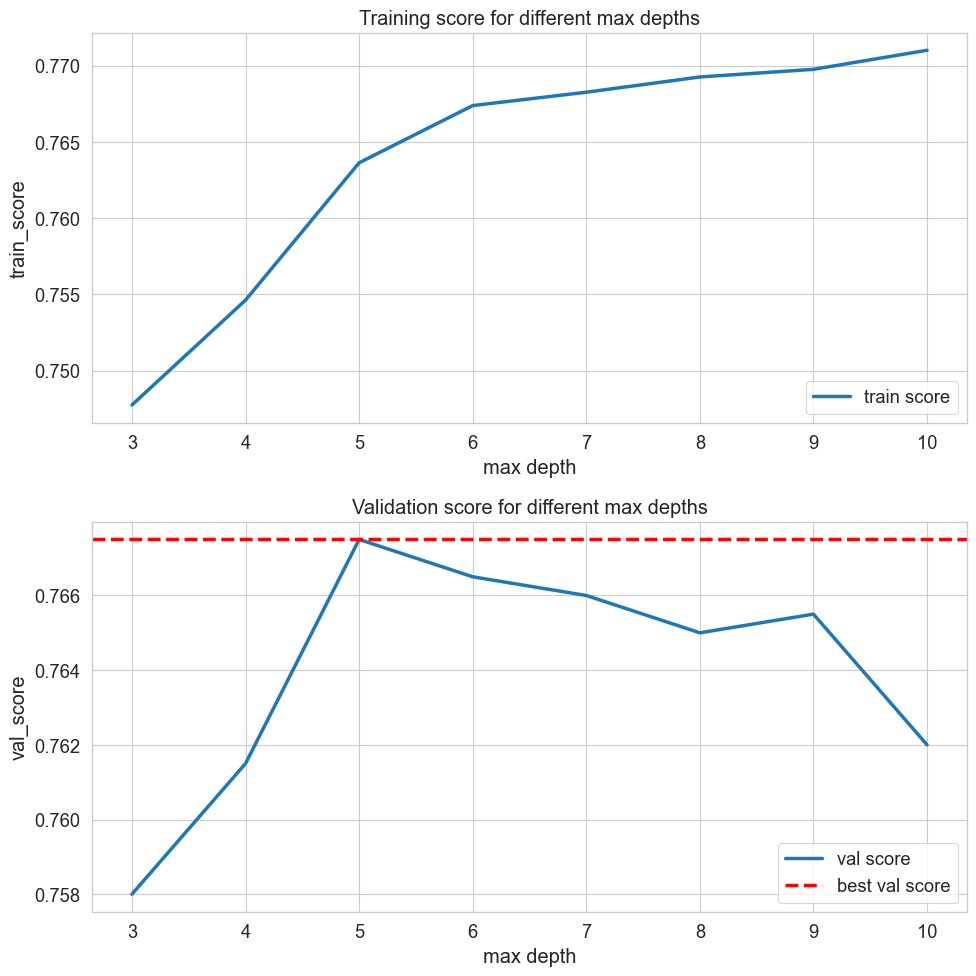

In [53]:
sns.set_style("whitegrid")
sns.set_context("paper", font_scale=1.5, rc={"lines.linewidth": 2.5})

fig, ax = plt.subplots(ncols=2, nrows=1, figsize=(10, 10), sharey=True, sharex=True)
plt.subplot(2, 1, 1)
sns.lineplot(x='max depth', y='train_score', data=result_over_3, label="train score")
plt.title('Training score for different max depths')
plt.legend(loc='lower right')


plt.subplot(2, 1, 2)
sns.lineplot(x='max depth', y='val_score', data=result_over_3, label="val score")
plt.title('Validation score for different max depths')

# plot horisontal line at the best validation score
plt.axhline(result_over_3["val_score"].max(), color='r', linestyle='--', label="best val score")

plt.legend(loc='lower right')

plt.tight_layout()